# Imports

In [3]:
import numpy as np
from matplotlib.pyplot import subplots , cm
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

# Conceptual Exercises

## 1.

### 1.a Question

> Sketch the hyperplane $1 + 3X1 − X2 = 0$. Indicate the set of points for which $1 + 3X1 − X2 > 0$, as well as the set of points for which $1 + 3X1 − X2 < 0$.

### 1.a Answer

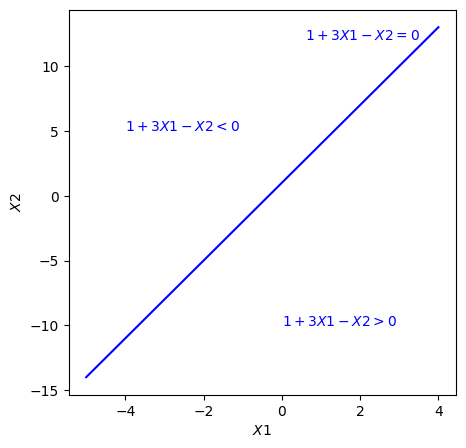

In [4]:
fig, ax = subplots(figsize=(5, 5))
x1 = np.array(range(-5, 5))
x2 = 1 + 3 * x1
ax.plot(x1, x2, color="blue")
ax.text(0, -10, "$1 + 3X1 - X2 > 0$", color="blue")
ax.text(-4, 5, "$1 + 3X1 - X2 < 0$", color="blue")
ax.text(0.6, 12, "$1 + 3X1 - X2 = 0$", color="blue")
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

### 1.b Question

> On the same plot, sketch the hyperplane $−2 + X1 + 2X2 = 0$. Indicate the set of points for which $−2 + X1 + 2X2 > 0$, as well as the set of points for which $−2 + X1 + 2X2 < 0$.

### 1.b Answer

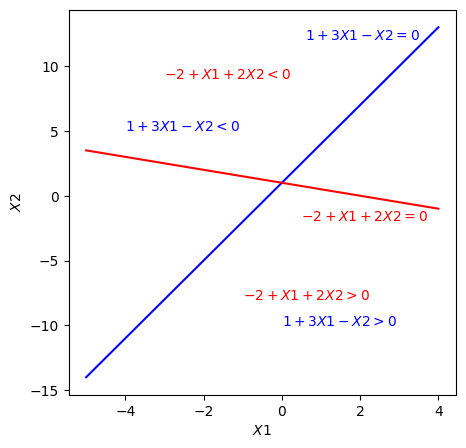

In [5]:
fig, ax = subplots(figsize=(5, 5))
x1 = np.array(range(-5, 5))
x2 = 1 + 3 * x1
x3 = 1 - 0.5 * x1

ax.plot(x1, x2, color="blue")
ax.text(0, -10, "$1 + 3X1 - X2 > 0$", color="blue")
ax.text(-4, 5, "$1 + 3X1 - X2 < 0$", color="blue")
ax.text(0.6, 12, "$1 + 3X1 - X2 = 0$", color="blue")

ax.plot(x1, x3, color="red")
ax.text(-1, -8, "$-2 + X1 + 2X2 > 0$", color="red")
ax.text(-3, 9, "$-2 + X1 + 2X2 < 0$", color="red")
ax.text(0.5, -1.9, "$-2 + X1 + 2X2 = 0$", color="red")

ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

## 2.

### 2.a Question

> Sketch the curve $(1 + X1)^2 + (2 − X2)^2 = 4$. On your sketch, indicate the set of points for which $(1 + X1)^2 + (2 − X2)^2 > 4$, as well as the set of points for which $(1 + X1)^2 + (2 − X2)^2 ≤ 4$.

### 2.a Answer

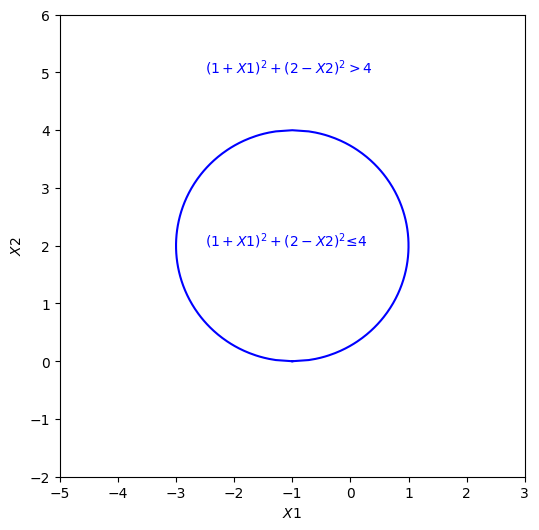

In [6]:
fig, ax = subplots(figsize=(6, 6))
n = 200
x2 = np.concatenate((np.linspace(0, 4, n), np.linspace(4, 0, n)))
x1 = np.zeros(n * 2)
x1[:n] = (4 - (2 - x2[:n]) ** 2) ** 0.5 - 1
x1[n:] = -(4 - (2 - x2[n:]) ** 2) ** 0.5 - 1
ax.plot(x1, x2, color="blue")
ax.text(-2.5, 5, "$(1 + X1)^2 + (2 - X2)^2 > 4$", color="blue")
ax.text(-2.5, 2, "$(1 + X1)^2 + (2 - X2)^2 ≤ 4$", color="blue")
ax.set_xlim(-5, 3)
ax.set_ylim(-2, 6)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

### 2.b Question

> Suppose that a classifier assigns an observation to the blue class if $(1 + X1)^2 + (2 − X2)^2 > 4$, and to the red class otherwise. To what class are the following observations classified?
> 1. $(0, 0)$
> 2. $(−1, 1)$
> 3. $(2, 2)$
> 4. $(3, 8)$

### 2.b Answer

In [7]:
def classify(x1, x2):
    return "blue" if (1 + x1) ** 2 + (2 - x2) ** 2 > 4 else "red"

for x1, x2 in [
    (0, 0),
    (-1, 1),
    (2, 2),
    (3, 8),
]:
    print(f"({x1}, {x2}): {classify(x1, x2)}")

(0, 0): blue
(-1, 1): red
(2, 2): blue
(3, 8): blue


### 2.c Question

> Argue that while the decision boundary above is not linear in terms of $X1$ and $X2$, it is linear in terms of $X1$, $X2$, $X1^2$, and $X2^2$.

### 2.c Answer

The decision boundary can be rearranged to get $X1^2 + 2X1 + X2^2 - 4X2 + 1 = 0$. If we let $X3 := X1^2$ and $X4 := X2^2$ then we have $X3 + 2X1 + X3 - 4X2 + 1 = 0$, which is of the form of a linear classification boundary.

## 3.

### 3.a Question

> We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label.
| Obs. | X1  | X2  | Y    |
|------|-----|-----|------|
| 1    | 3   | 4   | Red  |
| 2    | 2   | 2   | Red  |
| 3    | 4   | 4   | Red  |
| 4    | 1   | 4   | Red  |
| 5    | 2   | 1   | Blue |
| 6    | 4   | 3   | Blue |
| 7    | 4   | 1   | Blue |

> Sketch the observations.

### 3.a Answer

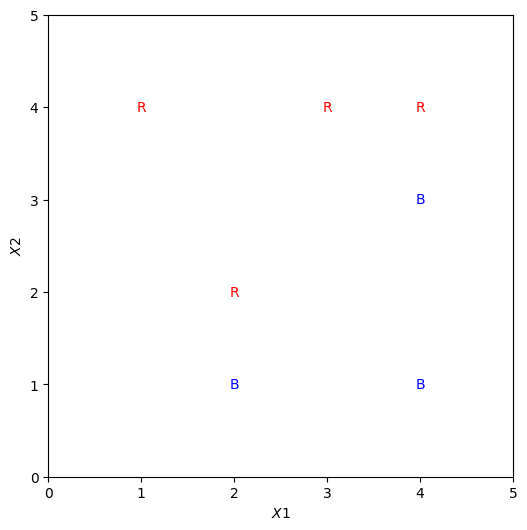

In [8]:
import pandas as pd

# Create the data
data = {
    'Obs.': [1, 2, 3, 4, 5, 6, 7],
    'X1': [3, 2, 4, 1, 2, 4, 4],
    'X2': [4, 2, 4, 4, 1, 3, 1],
    'Y': ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']
}

# Create the DataFrame
data = pd.DataFrame(data)

fig, ax = subplots(figsize=(6, 6))
for _, r in data.iterrows():
    ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

### 3.b Question

> Sketch the optimal separating hyperplane, and provide the equation for this hyperplane.

### 3.b Answer

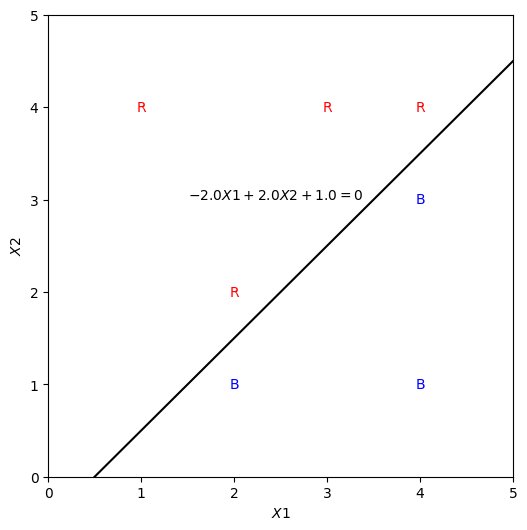

In [9]:
X = data[["X1", "X2"]].values
y = data["Y"].values
svm_ = SVC(C=1e10, kernel='linear').fit(X, y)


fig, ax = subplots(figsize=(6, 6))
for _, r in data.iterrows():
    ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

x1 = np.linspace(*ax.get_xlim())
x2 =  - 1 * (svm_.coef_[0][0] * x1 + svm_.intercept_[0]) / svm_.coef_[0][1]
ax.plot(x1, x2, color="k")
_ = ax.text(1.5, 3, f"${round(svm_.coef_[0][0], 1)}X1 + {round(svm_.coef_[0][1], 1)}X2 + {round(svm_.intercept_[0], 1)} = 0$")

### 3.c Question

> Describe the classification rule for the maximal margin classifier and provide its coefficients.

### 3.c Answer

In [10]:
print(f"Red: {round(svm_.coef_[0][0], 1)}X1 + {round(svm_.coef_[0][1], 1)}X2 + {round(svm_.intercept_[0], 1)} > 0")
print(f"Blue: {round(svm_.coef_[0][0], 1)}X1 + {round(svm_.coef_[0][1], 1)}X2 + {round(svm_.intercept_[0], 1)} <= 0")
print(f"Coefficients: ({round(svm_.intercept_[0], 1)}, {round(svm_.coef_[0][0], 1)}, {round(svm_.coef_[0][1], 1)})")

Red: -2.0X1 + 2.0X2 + 1.0 > 0
Blue: -2.0X1 + 2.0X2 + 1.0 <= 0
Coefficients: (1.0, -2.0, 2.0)


### 3.d Question

> On your sketch, indicate the margin for the maximal margin hyperplane.

### 3.d Answer

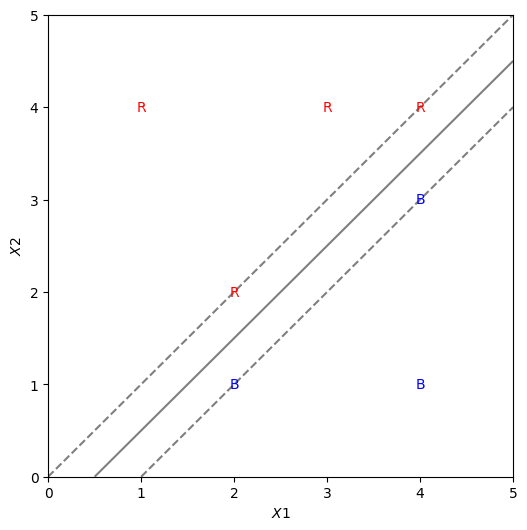

In [11]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import pyplot as plt

X = data[["X1", "X2"]].values
y = data["Y"].values
svm_ = SVC(C=1e10, kernel='linear').fit(X, y)

fig, ax = subplots(figsize=(6, 6))
for _, r in data.iterrows():
    ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

_ = DecisionBoundaryDisplay.from_estimator(
    svm_,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

### 3.e Question

> Indicate the support vectors for the maximal margin classifier.

### 3.e Answer

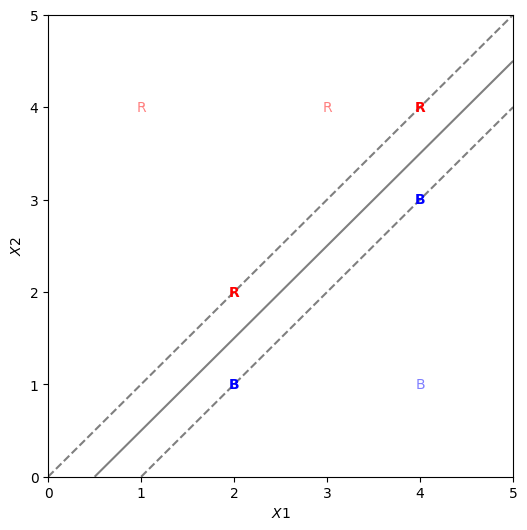

In [12]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import pyplot as plt

X = data[["X1", "X2"]].values
y = data["Y"].values
svm_ = SVC(C=1e10, kernel='linear').fit(X, y)

fig, ax = subplots(figsize=(6, 6))
for _, r in data.iterrows():
    if np.array([([r["X1"], r["X2"]] == x).all() for x in svm_.support_vectors_]).any():
        ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center", weight="bold")
    else:
        ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center", weight="normal", alpha=0.5)
        
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

_ = DecisionBoundaryDisplay.from_estimator(
    svm_,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)

### 3.f Question

> Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane

### 3.f Answer

The seventh observation is not a support vector, nor would it be with a sufficiently small movement. Support vectors are the only points that affect the maximal margin hyperplane. Therefore a slight movement of the seventh observation would not make affect the maximal margin hyperplane.

### 3.g Question

> Sketch a hyperplane that is not the optimal separating hyper-plane, and provide the equation for this hyperplane

### 3.g Answer

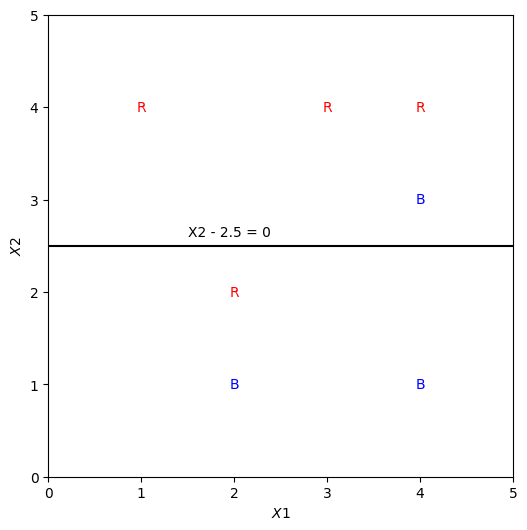

In [13]:
X = data[["X1", "X2"]].values
y = data["Y"].values
svm_ = SVC(C=1e10, kernel='linear').fit(X, y)


fig, ax = subplots(figsize=(6, 6))
for _, r in data.iterrows():
    ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center")
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

x1 = np.linspace(*ax.get_xlim())
x2 =  [2.5] * len(x1)
ax.plot(x1, x2, color="k")
_ = ax.text(1.5, 2.6, f"X2 - 2.5 = 0")

### 3.h Question

> Draw an additional observation on the plot so that the two classes are no longer separable by a hyperplane

### 3.h Answer

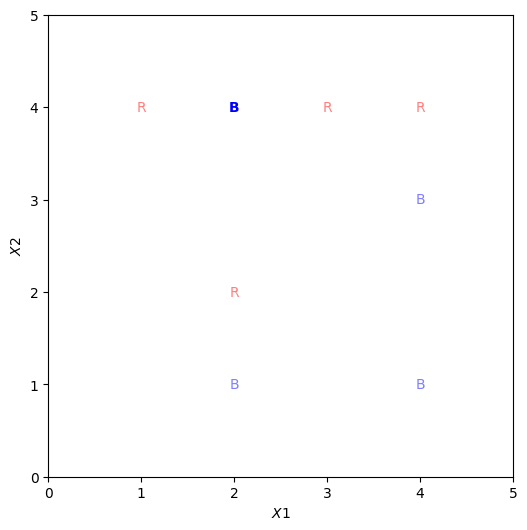

In [14]:
X = data[["X1", "X2"]].values
y = data["Y"].values
svm_ = SVC(C=1e10, kernel='linear').fit(X, y)


fig, ax = subplots(figsize=(6, 6))
for _, r in data.iterrows():
    ax.text(r["X1"], r["X2"], r["Y"][0], color=r["Y"].lower(), verticalalignment="center", horizontalalignment="center", alpha=0.5)
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

ax.text(2, 4, "B", color="blue", verticalalignment="center", horizontalalignment="center", weight="bold")

ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

# Applied Exercises

## 4.

### 4.a Question

> Generate a simulated two-class data set with 100 observations and two features in which there is a visible but non-linear separation between the two classes.

### 4.a Answer

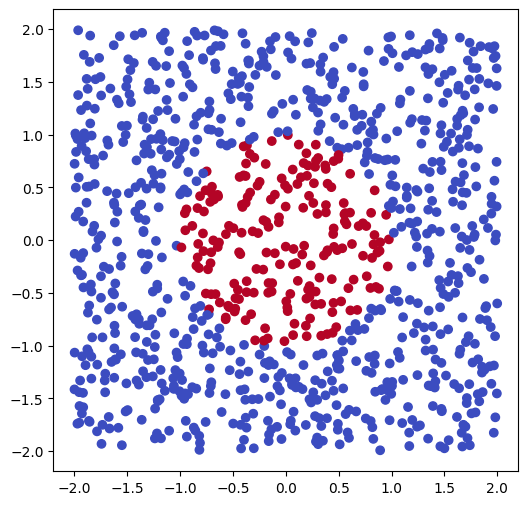

In [15]:
n = 1000
X = np.random.uniform(-2, 2, size=n * 2).reshape(n, 2)
y = X[:, 0] ** 2.0 + X[:, 1] ** 2 < 1
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

### 4.b Question

> Show that in this setting, a support vector machine with a polynomial kernel (with degree greater than 1) or a radial kernel will outperform a support vector classifier on the training data.

### 4.b Answer

In [17]:
# Add polynomial features
X_poly = X.copy()
X_poly = np.hstack((X_poly, X_poly[:, [0]] ** 2))
X_poly = np.hstack((X_poly, X_poly[:, [1]] ** 2))

# Split data into test and training
X_train_poly, X_test_poly, y_train, y_test = skm.train_test_split(X_poly, y, test_size=0.5, random_state=0)
X_train = X_train_poly[:, :2]
X_test = X_test_poly[:, :2]

# Create classifiers
svc = SVC(kernel="linear", C=1)
svc_poly = SVC(kernel="linear", C=1)
svm_radial = SVC(kernel="rbf", C=1, gamma=1)

kfold = skm.KFold(
    5,
    random_state =0,
    shuffle=True
)

# Perform k fold validation to find best params
grid_svc = skm.GridSearchCV(
    svc,
    {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

grid_svc_poly = skm.GridSearchCV(
    svc_poly,
    {'C':[0.001, 0.01, 0.1, 1, 5, 10, 100]},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svc_poly.fit(X_train_poly, y_train)
svc_poly = grid_svc_poly.best_estimator_

grid_svm_radial = skm.GridSearchCV(
    svm_radial,
    {
        'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
        'gamma': [0.1, 0.5, 1, 2, 3, 4],
    },
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svm_radial.fit(X_train, y_train)
svm_radial = grid_svm_radial.best_estimator_

# Generate confusion tables
y_hat_train = svc.predict(X_train)
confusion_linear = confusion_table(y_hat_train , y_train)
confusion_linear.loc["method", :] = "linear"

y_hat_train = svc_poly.predict(X_train_poly)
confusion_poly = confusion_table(y_hat_train , y_train)
confusion_poly.loc["method", :] = "polynomial"

y_hat_train = svm_radial.predict(X_train)
confusion_radial = confusion_table(y_hat_train , y_train)
confusion_radial.loc["method", :] = "radial"

# Show results
pd.concat([confusion_linear, confusion_poly, confusion_radial], 1)

C:\Users\ec_19\AppData\Local\Temp\ipykernel_14580\579453385.py:70: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat([confusion_linear, confusion_poly, confusion_radial], 1)


Truth,False,True,False,True,False,True
Predicted,,,,,,
False,405.0,95.0,405.0,0.0,403.0,2.0
True,0.0,0.0,0.0,95.0,2.0,93.0
method,linear,linear,polynomial,polynomial,radial,radial


### 4.c Question

> Which technique performs best on the test data? Make plots and report training and test error rates in order to back up your assertions.

### 4.c Answer

Test errors

In [18]:
# Generate confusion tables
y_hat_test = svc.predict(X_test)
confusion_linear = confusion_table(y_hat_test , y_test)
confusion_linear.loc["method", :] = "linear"

y_hat_test = svc_poly.predict(X_test_poly)
confusion_poly = confusion_table(y_hat_test , y_test)
confusion_poly.loc["method", :] = "polynomial"

y_hat_test = svm_radial.predict(X_test)
confusion_radial = confusion_table(y_hat_test , y_test)
confusion_radial.loc["method", :] = "radial"

# Show results
pd.concat([confusion_linear, confusion_poly, confusion_radial], 1)

C:\Users\ec_19\AppData\Local\Temp\ipykernel_14580\3333010707.py:15: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat([confusion_linear, confusion_poly, confusion_radial], 1)


Truth,False,True,False,True,False,True
Predicted,,,,,,
False,398.0,102.0,398.0,0.0,395.0,4.0
True,0.0,0.0,0.0,102.0,3.0,98.0
method,linear,linear,polynomial,polynomial,radial,radial


Polynomial works the best in that it has the fewest test errors.

## 5.

### 5.a Question

> Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y-axis.

### 5.a Answer

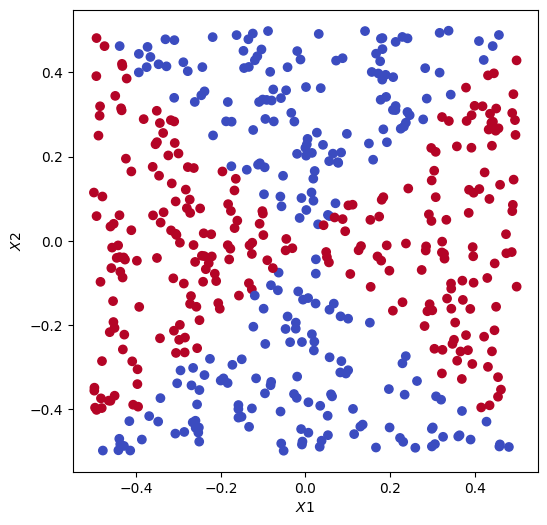

In [19]:
rng = np.random.default_rng (5)
x1 = rng.uniform(size =500) - 0.5
x2 = rng.uniform(size =500) - 0.5
X = pd.DataFrame(np.concatenate([x1.reshape(1, -1), x2.reshape(1, -1)]).T, columns=["X1", "X2"])
y = x1**2 - x2**2 > 0
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X["X1"], X["X2"], c=y, cmap=cm.coolwarm)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

### 5.b Question

> Fit a logistic regression model to the data, using X1 and X2 as predictors.

### 5.b Answer

In [20]:
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS, summarize

design = MS(["X1", "X2"])

X_transformed = design.fit_transform(X)
glm = sm.GLM(y, X_transformed, family=sm.families.Binomial())  # Binomial ensures logistic regresion rather than other GLM.
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.0221,0.090,0.246,0.805
X1,-0.1662,0.308,-0.540,0.589
X2,0.0901,0.306,0.294,0.769


### 5.c Question

> Apply this model to the data in order to obtain a predicted class label for each observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

### 5.c Answer

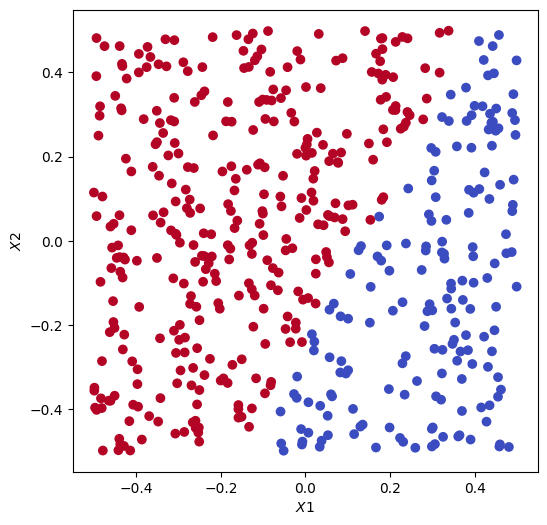

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X["X1"], X["X2"], c=results.predict() > 0.5, cmap=cm.coolwarm)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

### 5.d Question

> Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. $X2$, $X2^2$, $X1 × X2$, $log(X2$), and so forth). Apply this model to the data in order to obtain a predicted class label for each observation. Plot the observations, colored according to the predicted class labels

### 5.d Answer

Optimization terminated successfully.
         Current function value: 0.201386
         Iterations 11


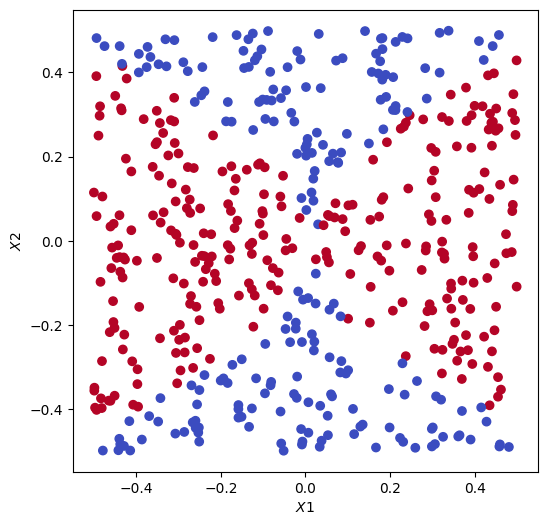

In [22]:
import statsmodels.api as sm

X_poly = X.copy()
X_poly.loc[:, "X1 ^ 2"] = X_poly["X1"] ** 2
X_poly.loc[:, "X2 ^ 4"] = X_poly["X2"] ** 4

model = sm.Logit(y, X_poly,)
result = model.fit()

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X["X1"], X["X2"], c=result.predict(X_poly) > 0.5, cmap=cm.coolwarm)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

In [23]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      496
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Aug 2024   Pseudo R-squ.:                  0.7094
Time:                        15:26:28   Log-Likelihood:                -100.69
converged:                       True   LL-Null:                       -346.54
Covariance Type:            nonrobust   LLR p-value:                3.018e-106
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
X1            -1.8868      0.977     -1.931      0.053      -3.802       0.028
X2            -0.1880      0.806     -0.233      0.816      -1.769       1.393
X1 ^ 2        66.2679      8.839      7.497      0.0

### 5.e Question

> Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class label.

### 5.e Answer

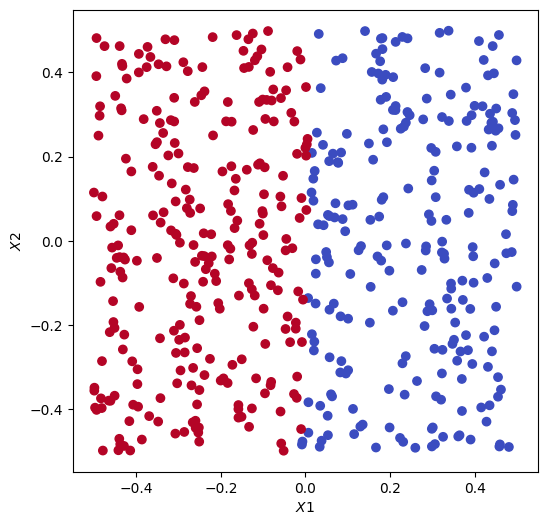

In [24]:
# Create classifiers
svc = SVC(kernel="linear", C=1e5)
svc.fit(X, y)
y_hat = svc.predict(X)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X["X1"], X["X2"], c=y_hat, cmap=cm.coolwarm)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

### 5.f Question

> Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels. Comment on your results.

### 5.f Answer

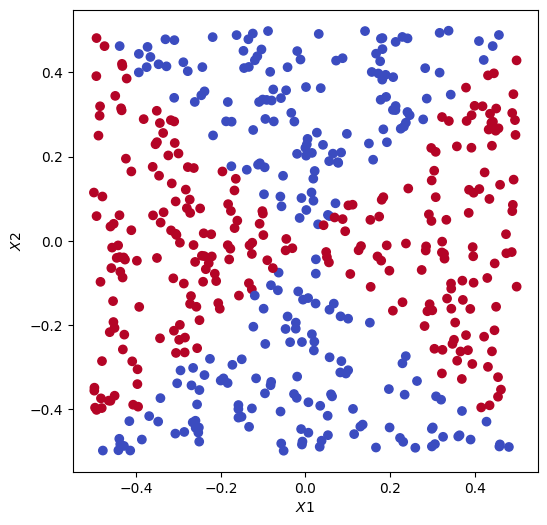

In [25]:
# Create classifiers
svc = SVC(kernel="rbf", C=1e5)
svc.fit(X, y)
y_hat = svc.predict(X)

fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X["X1"], X["X2"], c=y_hat, cmap=cm.coolwarm)
ax.set_xlabel("$X1$")
_ = ax.set_ylabel("$X2$")

SVM with a non-linear kernel performs similarly to a logistic regression, without the need to artificially pick polynomial features.

## 6.

### 6.a Question

> At the end of Section 9.6.1, it is claimed that in the case of data that is just barely linearly separable, a support vector classifier with a small value of C that misclassifies a couple of training observations may perform better on test data than one with a huge value of C that does not misclassify any training observations. You will now investigatecthis claim. Generate two-class data with p = 2 in such a way that the classes are just barely linearly separable.

### 6.a Answer

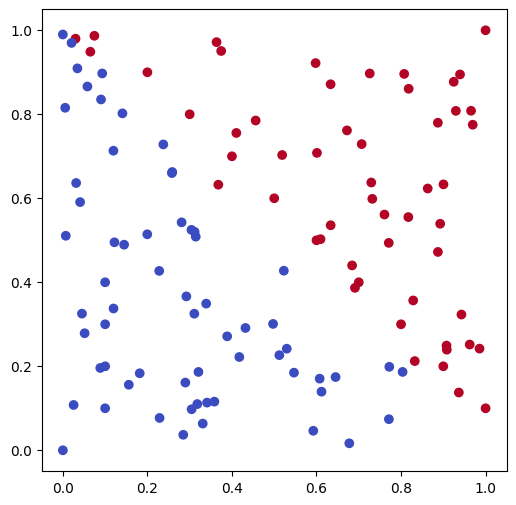

In [26]:
np.random.seed(42)
n = 100

# Slightly contrived example where the training data is not that similar to the total distribution
X_test = np.random.uniform(0, 1, size=n * 2).reshape(n, 2)
X_train = np.array(
    [
        [0.0, 0.99],
        [0.03, 0.98],
        [0.0, 0.0],
        [1.0, 1.0],
        [1.0, 0.1],
        [0.9, 0.2],
        [0.8, 0.3],
        [0.7, 0.4],
        [0.6, 0.5],
        [0.5, 0.6],
        [0.4, 0.7],
        [0.3, 0.8],
        [0.2, 0.9],
        [0.1, 0.1],
        [0.1, 0.2],
        [0.1, 0.3],
        [0.1, 0.4],
    ]
)
X = np.concatenate([X_train, X_test], 0)

y = X[:, 0] + X[:, 1] > 1.0
y_train = X_train[:, 0] + X_train[:, 1] > 1.0
y_test = X_test[:, 0] + X_test[:, 1] > 1.0
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=y, cmap=cm.coolwarm)

### 6.b Question

> Compute the cross-validation error rates for support vector classifiers with a range of C values. How many training observations are misclassified for each value of C considered, and how does this relate to the cross-validation errors obtained?

### 6.b Answer

<Axes: xlabel='C', ylabel='error'>

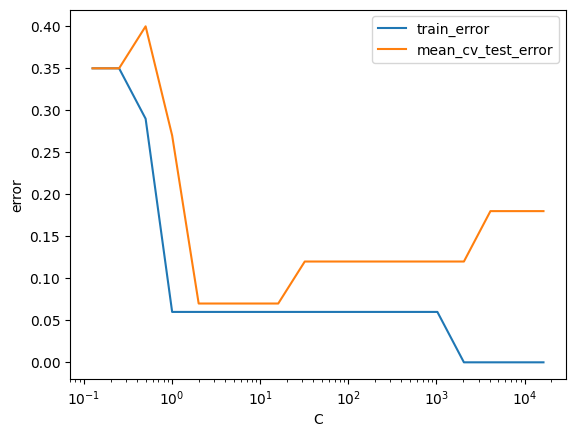

In [27]:
svc = SVC(kernel="linear", C=1)

c_values = [2 ** i for i in range(-3, 15)]

kfold = skm.KFold(
    5,
    random_state =0,
    shuffle=True
)
grid_svc = skm.GridSearchCV(
    svc,
    {'C':c_values},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

out = pd.DataFrame(grid_svc.cv_results_)[["param_C", "mean_test_score"]]
out.loc[:, "mean_cv_test_error"] = 1 - out["mean_test_score"]
out = out.rename(
    columns={"param_C": "C"}
).set_index("C")[["mean_cv_test_error"]]

for c in c_values:
    svc = SVC(kernel="linear", C=c)
    svc.fit(X_train, y_train)
    y_hat_test = svc.predict(X_test)
    confusion_test = confusion_table(y_hat_test , y_test)
    
    y_hat_train = svc.predict(X_train)
    confusion_train = confusion_table(y_hat_train , y_train)

    out.loc[c, "train_error"] = (confusion_train.loc[True, False] + confusion_train.loc[False, True]) / confusion_train.sum().sum()
    out.loc[c, "test_error"] = (confusion_test.loc[True, False] + confusion_test.loc[False, True]) / confusion_test.sum().sum()

out.round(2)[["train_error", "mean_cv_test_error"]].plot(logx=True, ylabel="error")

Higher values of cost for misclassified values `C` leads to fewer training errors. However in cross validation this leads to higher mean cross validation errors.

### 6.c Question

> Generate an appropriate test data set, and compute the test errors corresponding to each of the values of C considered. Which value of C leads to the fewest test errors, and how does this compare to the values of C that yield the fewest training errors and the fewest cross-validation errors?

### 6.c Answer

<Axes: xlabel='C', ylabel='error'>

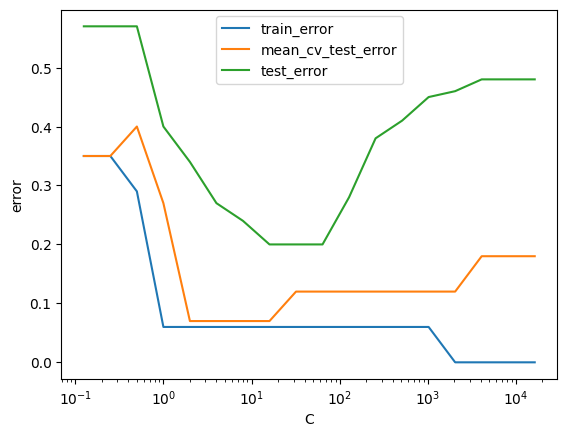

In [28]:
out.round(2)[["train_error", "mean_cv_test_error", "test_error"]].plot(logx=True, ylabel="error")

Test errors are higher (45-48%) for costs which give the lowest training error. It's best to pick costs via cross validation which identifies

## 7.

### 7.a Question

> Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median. Fit a support vector classifier to the data with various values of `C`, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

### 7.a Answer

In [29]:
auto = load_data('Auto')
y_train = auto["mpg"] > auto["mpg"].median()
X_train = auto[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
X_train = (X_train - X_train.mean()).div(X_train.std())  # Normalise features to get more meaningful coefs

svc = SVC(kernel="linear", C=1)

c_values = [10 ** i for i in range(-2, 5)]

kfold = skm.KFold(
    5,
    random_state =0,
    shuffle=True
)
grid_svc = skm.GridSearchCV(
    svc,
    {'C':c_values},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

out = pd.DataFrame(grid_svc.cv_results_)[["param_C", "mean_test_score"]]
out.loc[:, "mean_cv_test_error"] = 1 - out["mean_test_score"]
out = out.rename(
    columns={"param_C": "C"}
).set_index("C")[["mean_cv_test_error"]]
out

,mean_cv_test_error
C,
0.01,0.091821
0.10,0.086693
1.00,0.086660
10.00,0.091756
100.00,0.091756
1000.00,0.096852
10000.00,0.096852


Interestingly the cross-validation error is relatively insensitive to which value of C we use, however there does appear to be a minimum around 0.1-1.0, meaning we are allowing for quite a few support vectors. This is intuitive assuming the data is non seperable and we have co-linear variables so you'd assume that you'd do better with more support vectors and more tolerance of misclassified training data.

In [30]:
pd.Series(grid_svc.best_estimator_.coef_[0], X_train.columns, name="coef").to_frame()

,coef
cylinders,-0.674866
displacement,0.124729
horsepower,-0.851848
weight,-1.862593
acceleration,-0.198922
year,0.959697
origin,0.217071


Intuitively lighter, smaller enginged and more recent cars have better mpg, and displacement and origin have less impact

C:\Users\ec_19\myvenv\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Year z score')

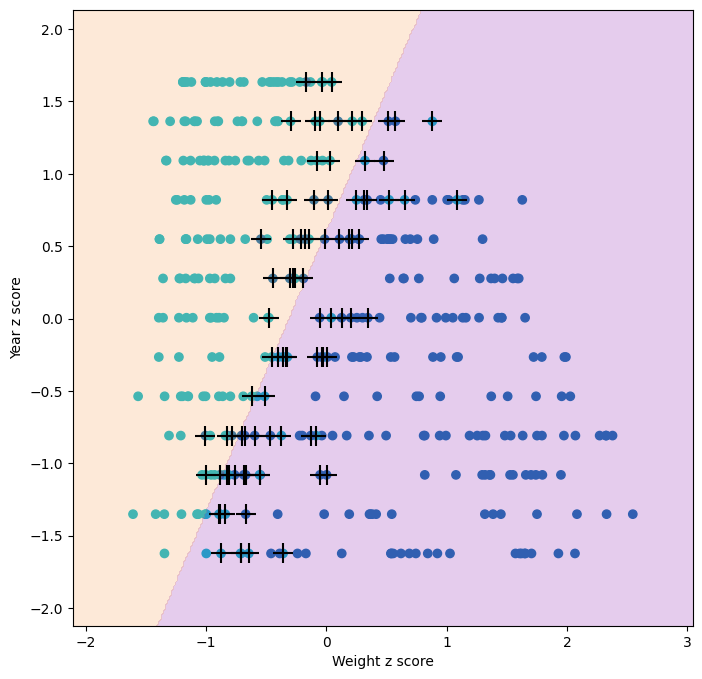

In [31]:
fig , ax = subplots(figsize =(8 ,8))
plot_svm(
    X_train,
    y_train,
    grid_svc.best_estimator_,
    ax=ax,
    features=[X_train.columns.get_loc("weight"), X_train.columns.get_loc("year")],
)
ax.set_xlabel("Weight z score")
ax.set_ylabel("Year z score")

Note the large number of support vectors and the linear decision boundary.

### 7.b Question

> Now repeat (b), this time using SVMs with radial basis kernels, with different values of gamma and degree and
C. Comment on your results

### 7.b Answer

In [ ]:
auto = load_data('Auto')
y_train = auto["mpg"] > auto["mpg"].median()
X_train = auto[["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]]
X_train = (X_train - X_train.mean()).div(X_train.std())  # Normalise features to get more meaningful coefs

svc = SVC(kernel="rbf", C=1, gamma=1)

c_values = [10 ** i for i in range(-2, 5)]
gamma_values = [2 ** i for i in range(-3, 3)]

kfold = skm.KFold(
    5,
    random_state =0,
    shuffle=True
)
grid_svc = skm.GridSearchCV(
    svc,
    {'C':c_values, "gamma": gamma_values},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

out = pd.DataFrame(grid_svc.cv_results_)[["param_C", "param_gamma", "mean_test_score"]]
out.loc[:, "mean_cv_test_error"] = 1 - out["mean_test_score"]
out = out.rename(
    columns={"param_C": "C", "param_gamma": "gamma"}
)[["C", "gamma", "mean_cv_test_error"]]
out.set_index(["C", "gamma"]).unstack().round(2)

Interestingly the cross-validation error is much more sensitive to which value of C we use, however there does appear to be a minimum around 0.1-10.0, meaning we are allowing for quite a few support vectors.

In [ ]:
fig , ax = subplots(figsize =(8 ,8))
plot_svm(
    X_train,
    y_train,
    grid_svc.best_estimator_,
    ax=ax,
    features=[X_train.columns.get_loc("weight"), X_train.columns.get_loc("year")],
)
ax.set_xlabel("Weight z score")
ax.set_ylabel("Year z score")

Note the non-linear decision boundary. Arguably this makes sense - the average weight of cars has probably changed over time as has the focus on mpg, so it makes sense that you might e.g. see newer cars all better than the median mpg whilst older cars weight was a much stronger determinent.

## 8.

### 8.a Question

This is basically a repeat of the previous questions but looking at the `OJ` data. Note that this is a bit **tricksy** - the OJ data needs some normalisation cleaning before it is usable (pointless duplicate columns).

### 8.a Answer

In [33]:
oj = load_data('OJ')
oj_clean = oj[
    [
        "Purchase",
        'WeekofPurchase',
        'StoreID',
        'PriceCH',
        'PriceMM',
        # 'DiscCH',  # Don't want this and PctDisc as duplicative
        # 'DiscMM',  # Don't want this and PctDisc as duplicative
        'SpecialCH',
        'SpecialMM',
        'LoyalCH',
        # 'SalePriceMM',  # Don't want this and SalePriceMM and CH as duplicative
        # 'SalePriceCH',  # Don't want this and SalePriceMM and CH as duplicative
        'PriceDiff',
        # 'Store7', Doing hot encoding of store ID
        'PctDiscMM',
        'PctDiscCH',  # Don't want this and Disc as duplicative
        'ListPriceDiff',
        # 'STORE'  Duplicate of StoreID?
    ]
]
oj_clean = pd.get_dummies(oj_clean, columns=['StoreID'], drop_first=True)#.drop(columns=["StoreID"])
oj_clean = (oj_clean - oj_clean.mean()).div(oj_clean.std())
oj_clean.loc[:, "Purchase"] = oj["Purchase"]
oj_clean.head()

C:\Users\ec_19\AppData\Local\Temp\ipykernel_14580\4070364502.py:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  oj_clean = (oj_clean - oj_clean.mean()).div(oj_clean.std())
C:\Users\ec_19\AppData\Local\Temp\ipykernel_14580\4070364502.py:25: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  oj_clean = (oj_clean - oj_clean.mean()).div(oj_clean.std())


,ListPriceDiff,LoyalCH,PctDiscCH,PctDiscMM,PriceCH,PriceDiff,PriceMM,Purchase,SpecialCH,SpecialMM,StoreID_2,StoreID_3,StoreID_4,StoreID_7,WeekofPurchase
0,0.204671,-0.213688,-0.438901,-0.582728,-1.151523,0.344355,-0.709981,CH,-0.416033,-0.438959,-0.511417,-0.473336,-0.386215,-0.705786,-1.117174
1,0.204671,0.111153,-0.438901,0.898738,-1.151523,-0.760362,-0.709981,CH,-0.416033,2.275989,-0.511417,-0.473336,-0.386215,-0.705786,-0.988625
2,0.111678,0.371026,1.029756,-0.582728,-0.072772,0.933538,0.034146,CH,-0.416033,-0.438959,-0.511417,-0.473336,-0.386215,-0.705786,-0.602978
3,-2.027152,-0.538530,-0.438901,-0.582728,-1.739933,-0.539419,-2.942365,MM,-0.416033,-0.438959,-0.511417,-0.473336,-0.386215,-0.705786,-1.759918
4,-2.027152,1.269326,-0.438901,-0.582728,-1.739933,-0.539419,-2.942365,CH,-0.416033,-0.438959,-0.511417,-0.473336,-0.386215,1.415536,-1.695644


In [34]:
train = oj_clean.sample(800)
test = oj_clean[~oj_clean.index.isin(train.index)]
y_train = train["Purchase"] == "MM"
y_test = test["Purchase"] == "MM"

X_train = train[[c for c in train.columns if c != "Purchase"]]
X_test = test[[c for c in test.columns if c != "Purchase"]]

In [35]:
svc = SVC(kernel="linear", C=0.01)
svc.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [36]:
len(svc.support_vectors_)

445

In [37]:
y_hat_train = svc.predict(X_train)
confusion = confusion_table(y_hat_train , y_train)
(confusion.loc[False, True] + confusion.loc[True, False]) / confusion.sum().sum()

0.1725

In [38]:
y_hat_test = svc.predict(X_test)
confusion = confusion_table(y_hat_test , y_test)
(confusion.loc[False, True] + confusion.loc[True, False]) / confusion.sum().sum()

0.16296296296296298

In [39]:
c_values = [10 ** i for i in range(-2, 2)]

kfold = skm.KFold(
    5,
    random_state =0,
    shuffle=True
)
grid_svc = skm.GridSearchCV(
    svc,
    {'C':c_values},
    refit=True,
    cv=kfold,
    scoring='accuracy'
)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

In [40]:
y_hat_train = svc.predict(X_train)
confusion = confusion_table(y_hat_train , y_train)
(confusion.loc[False, True] + confusion.loc[True, False]) / confusion.sum().sum()

0.165

In [41]:
y_hat_test = svc.predict(X_test)
confusion = confusion_table(y_hat_test , y_test)
(confusion.loc[False, True] + confusion.loc[True, False]) / confusion.sum().sum()

0.16296296296296298

Interestingly basically the same as for the arbitrary value of C above.